In [23]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import random

In [53]:
# Load the train dataset for mean calculation
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())

In [57]:
# compute mean and std of the train dataset
mean = train_dataset.data.float().mean() / 255
std = train_dataset.data.float().std() / 255

mean, std

(tensor(0.1307), tensor(0.3081))

In [55]:
# define transformation to be applied to the images
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(mean,), std=(std,))
])

# Load the train and test datasets with normalization. these normalizations are applied to the images when they are loaded
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)


In [64]:
# Compute the mean and standard deviation of the normalized dataset as a sanity check
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=len(train_dataset), shuffle=False)
data = next(iter(train_loader))

# data[0] is the tensor containing all the images
# data[1] is the tensor containing all the labels
mean = data[0].mean()
std = data[0].std()

mean, std

(tensor(-5.6966e-08), tensor(1.0000))

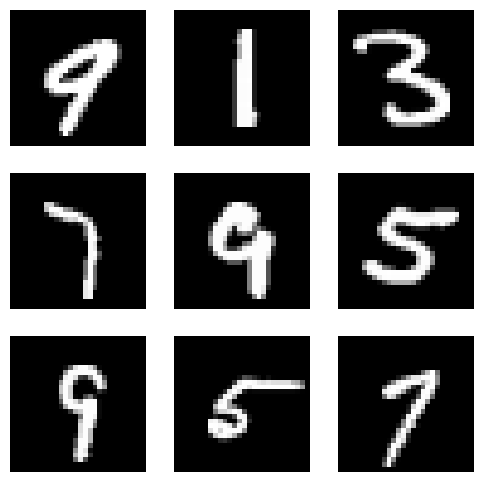

In [79]:
# Create a DataLoader to load the data in batches
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=9, shuffle=True)

# Get a batch of images from the DataLoader
images, labels = next(iter(test_loader))

# Create a grid of images and display them
fig, axs = plt.subplots(3, 3, figsize=(6, 6))
axs = axs.flatten()

for i, image in enumerate(images):
    # Convert the tensor image to a numpy array and transpose it
    image = np.transpose(image.numpy(), (1, 2, 0))

    # Display the image on the corresponding subplot
    axs[i].imshow(image[:, :, 0], cmap='gray')
    axs[i].axis('off')

# Show the plot
plt.show()